# <b><center>Customer Segmentation with K-means-clustering</b></center>

A simple but powerful example of Unsupervised Learning is K-means clustering. It can be implemented with the familiar idea of simple Euclidian distance which is very easy to understand. This is a great way to enter the world of clustering algorithms. 

Among many different uses of clustering, <b>Customer Segmentation</b> is one of the most interesting one. When a store is trying to segment their customer based on their features, this is a very reliable algorithm. 

## K-means Clustering Explained Visually

Here we are going to implement K-means clustering methods on some randomly generated data blobs. This will help us understand the algorithm.

### Import Libraries

In [2]:
import random 
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

/home/arif/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### K-means on a randomly generated dataset

We will create some random blobs that are random points but centered on some determined points. Applying the K-means, it will help us to see how K-means clusters and how it selects the center and its clusters.

In [3]:
np.random.seed(0)

In [4]:
x, y = make_blobs(n_samples=5000, centers= [[4,4], [-2,-1], [2,-3], [1,1]], cluster_std=0.9)

We have created 4 blobs centered around 

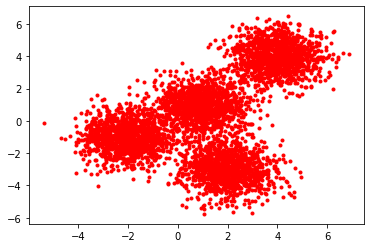

In [6]:
plt.scatter(x[:,0],x[:,1], marker=".", color='r')
plt.show()

In [10]:
k_means = KMeans(init= "k-means++", n_clusters= 4, n_init = 12)

In [11]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [55]:
cluster_size=[]
for i in range(k_means_labels.max()+1):
    cluster_size.append(k_means_labels[k_means_labels==i].size)
    print("Label ",i, " is :", k_means_labels[k_means_labels==i].size)
    

Label  0  is : 1251
Label  1  is : 1255
Label  2  is : 1239
Label  3  is : 1255


In [60]:
type(k_means)
cluster_size

[1251, 1255, 1239, 1255]

In [33]:
k_means_cluster_centers= k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

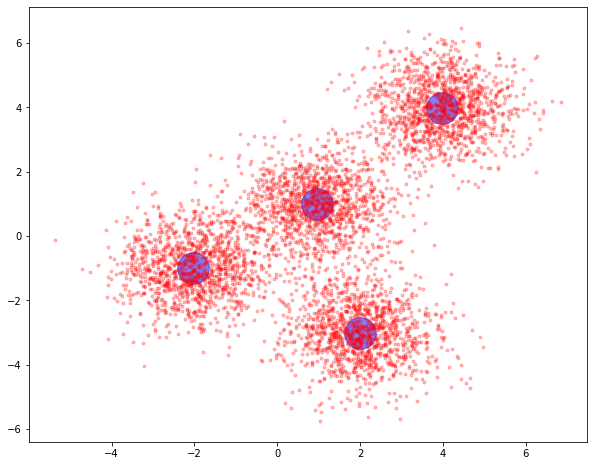

In [77]:
ax=plt.figure(figsize=(10,8))

plt.scatter(k_means_cluster_centers[:,0],k_means_cluster_centers[:,1],alpha=0.50,color='b',s=1000)
plt.scatter(x[:,0],x[:,1], marker=".", color='r',alpha=0.25)


plt.savefig("plot.png")

### Visualize the Plot

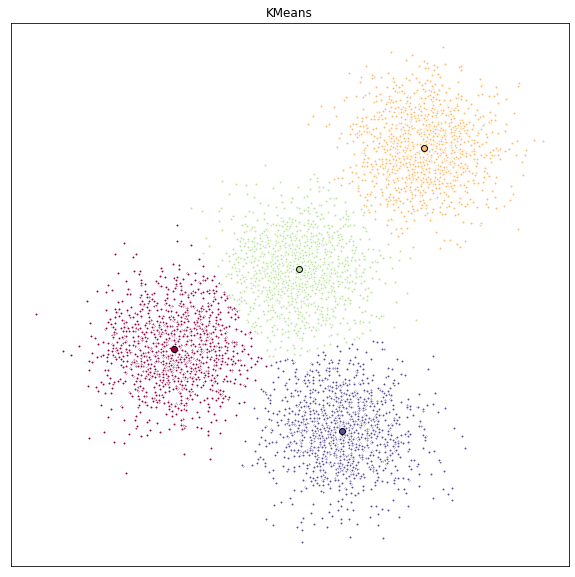

In [79]:
fig = plt.figure(figsize=(10,10))

colors = plt.cm.Spectral(np.linspace(0,1, len(set(k_means_labels))))

ax = fig.add_subplot(1,1,1)

for k, col in zip(range(len([[4,4], [-2,-1], [2,-3], [1,1]])),colors):
    
    my_members = (k_means_labels == k)
    
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor = col, marker='.')
    
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor= col, markeredgecolor='k', markersize=6)
    
ax.set_title('KMeans')

ax.set_xticks(())
ax.set_yticks(())

plt.show()

### Try with different numbers of clusters

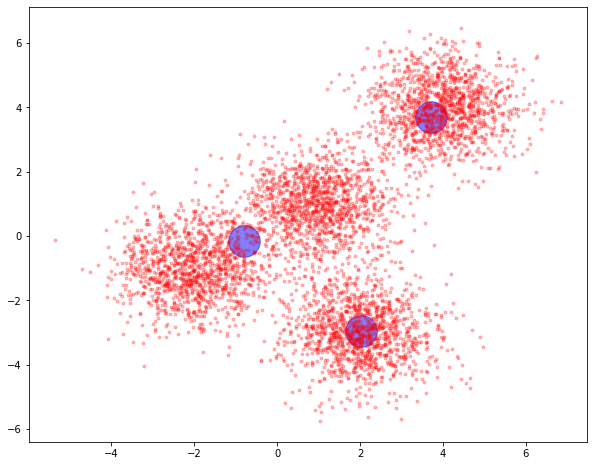

In [91]:
km = KMeans(init='k-means++', n_clusters= 3, n_init=120)
km.fit(x)
k_m_cluster_centers= km.cluster_centers_

ax1=plt.figure(figsize=(10,8))

plt.scatter(k_m_cluster_centers[:,0],k_m_cluster_centers[:,1],alpha=0.50,color='b',s=1000)
plt.scatter(x[:,0],x[:,1], marker=".", color='r',alpha=0.25)

plt.show()

## Customer Segmentation with K-Means

In [92]:
import pandas as pd

df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv",",")

df.head()

/home/arif/Anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


Let's drop the address. Since it is a categorical variable. It won't be helpful in clustering

In [93]:
df = df.drop('Address', axis=1)

df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Normalize the data

In [94]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)

c_data = StandardScaler().fit_transform(X)
c_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [96]:
km1 = KMeans(init="k-means++", n_clusters=3, n_init=12)

km1.fit(X)

labels = km1.labels_

print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

### Insights on the clusters

In [98]:
df['Cluster_km1']=labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_km1
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [100]:
df_0 = df[df['Cluster_km1']==0]
df_1 = df[df['Cluster_km1']==1]
df_2 = df[df['Cluster_km1']==2]
df_0.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_km1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
5,6,40,1,23,81,0.998,7.831,NaN,10.9,0
7,8,42,3,0,64,0.279,3.945,0.0,6.6,0
9,10,47,3,23,115,0.653,3.947,0.0,4.0,0
10,11,44,3,8,88,0.285,5.083,1.0,6.1,0


In [102]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_km1
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647,0.805882
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441,0.446120
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000,0.000000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000,1.000000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000,1.000000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000,1.000000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000,2.000000


In [120]:
df_label=df.groupby("Cluster_km1").mean()
df_label.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster_km1,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


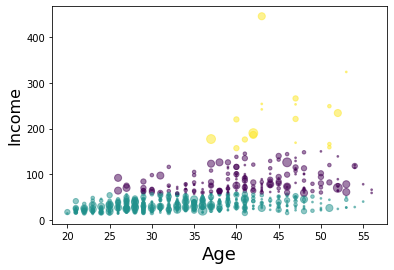

In [121]:
area = np.pi * (X[:,1])**2
plt.scatter(X[:,0],X[:,3], s= area, c= labels.astype(np.float), alpha=0.5)

plt.xlabel('Age', fontsize= 18)
plt.ylabel('Income', fontsize = 16)
plt.show()

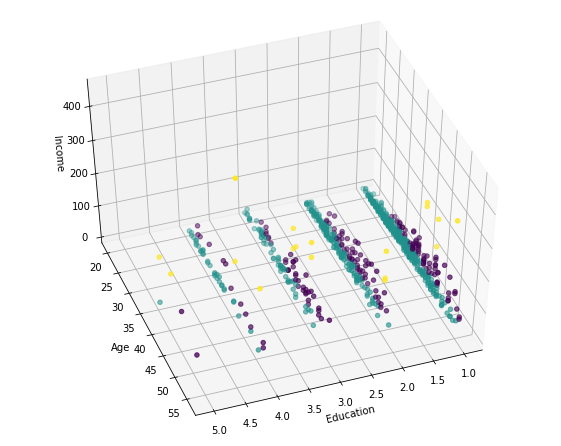

In [127]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))

plt.clf()

ax= Axes3D(fig, rect=[0,0,0.95, 1], elev=48, azim= 70)

plt.cla()

ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")

ax.scatter(X[:,1], X[:,0], X[:,3], c= labels.astype(np.float))
plt.show()

### The three category could be
<b>1. Young and Low income
    
<b>2. Middle Age, Medium Income

<b>3. Older and high income